# Fake News Detection using Machine Learning and Deep Learning

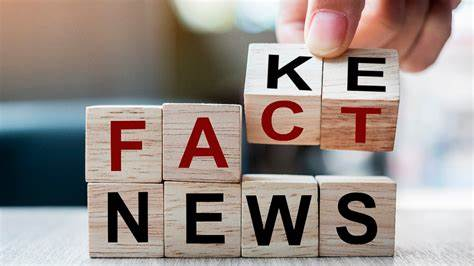

#### Importing the neccssary Libraries and Loading the Dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score,auc, classification_report, RocCurveDisplay
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

In [2]:
news_df = pd.read_csv('train (1).csv', names=["json ID", "label", "statement", "subject", "speaker", "job title", "state", "party",
                         "barely true", "false", "half true", "mostly true", "pantson fire","context"])

In [3]:
news_df['label'] = news_df['label'].replace({
    'pants-fire': 0,
    'FALSE': 0,
    'barely-true': 0,
    'half-true': 1,
    'mostly-true': 1,
    'TRUE': 1
})

In [4]:
news_df.head()

,json ID,label,statement,subject,speaker,job title,state,party,barely true,false,half true,mostly true,pantson fire,context
0,2635.json,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,1,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,0,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,1,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [5]:
news_df.shape

(10240, 14)

<AxesSubplot:xlabel='label', ylabel='count'>

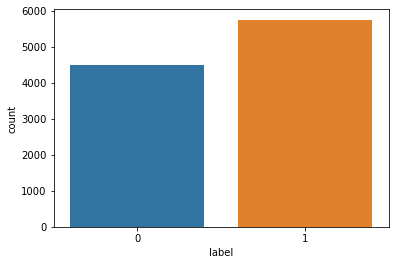

In [6]:
sns.countplot(x='label', data=news_df)

#### Data-Preprocessing

In [7]:
news_df.isna().sum()

json ID            0
label              0
statement          0
subject            2
speaker            2
job title       2897
state           2208
party              2
barely true        2
false              2
half true          2
mostly true        2
pantson fire       2
context          102
dtype: int64

In [8]:
news_df = news_df.fillna(' ')

In [9]:
news_df.isna().sum()

json ID         0
label           0
statement       0
subject         0
speaker         0
job title       0
state           0
party           0
barely true     0
false           0
half true       0
mostly true     0
pantson fire    0
context         0
dtype: int64

In [10]:
news_df['content'] = news_df['speaker']+" "+news_df['statement']

In [11]:
news_df

,json ID,label,statement,subject,speaker,job title,state,party,barely true,false,half true,mostly true,pantson fire,context,content
0,2635.json,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,dwayne-bohac Says the Annies List political gr...
1,10540.json,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,scott-surovell When did the decline of coal st...
2,324.json,1,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,barack-obama Hillary Clinton agrees with John ...
3,1123.json,0,Health care reform legislation is likely to ma...,health-care,blog-posting,,,none,7.0,19.0,3.0,5.0,44.0,a news release,blog-posting Health care reform legislation is...
4,9028.json,1,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,charlie-crist The economic turnaround started ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,5473.json,1,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report""",aclu-florida There are a larger number of shar...
10236,3408.json,1,Democrats have now become the party of the [At...,elections,alan-powell,,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview,alan-powell Democrats have now become the part...
10237,3959.json,1,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate,herman-cain Says an alternative to Social Secu...
10238,2253.json,0,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...,jeff-greene On lifting the U.S. Cuban embargo ...


In [12]:
news_df['content']

0        dwayne-bohac Says the Annies List political gr...
1        scott-surovell When did the decline of coal st...
2        barack-obama Hillary Clinton agrees with John ...
3        blog-posting Health care reform legislation is...
4        charlie-crist The economic turnaround started ...
                               ...                        
10235    aclu-florida There are a larger number of shar...
10236    alan-powell Democrats have now become the part...
10237    herman-cain Says an alternative to Social Secu...
10238    jeff-greene On lifting the U.S. Cuban embargo ...
10239    michael-steele The Department of Veterans Affa...
Name: content, Length: 10240, dtype: object

##### Performing Stemming
When Stemming is applied to the words in the corpus the word gives the base for that particular word. It is like from a tree with branches you are removing the branches till their stem.

In [13]:

ps = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [14]:
news_df['content'] = news_df['content'].apply(stemming)

In [15]:
news_df['content']

0        dwayn bohac say anni list polit group support ...
1        scott surovel declin coal start start natur ga...
2        barack obama hillari clinton agre john mccain ...
3        blog post health care reform legisl like manda...
4            charli crist econom turnaround start end term
                               ...                        
10235    aclu florida larger number shark attack florid...
10236    alan powel democrat becom parti atlanta metro ...
10237    herman cain say altern social secur oper galve...
10238    jeff green lift u cuban embargo allow travel cuba
10239    michael steel depart veteran affair manual tel...
Name: content, Length: 10240, dtype: object

In [16]:
X = news_df['content'].values
y = news_df['label'].values

In [17]:
print(X)

['dwayn bohac say anni list polit group support third trimest abort demand'
 'scott surovel declin coal start start natur ga took start begin presid georg w bush administr'
 'barack obama hillari clinton agre john mccain vote give georg bush benefit doubt iran'
 ...
 'herman cain say altern social secur oper galveston counti texa meant particip retir whole lot money social secur'
 'jeff green lift u cuban embargo allow travel cuba'
 'michael steel depart veteran affair manual tell veteran stuff like realli valu commun know encourag commit suicid']


##### Applying Tf-Idf Vectorization 
Term frequency–inverse document frequency, is a technique for text vectorization based on the Bag of words (BoW) model. It is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.

In [18]:
vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

In [19]:
print(X)

  (0, 8589)	0.3751918202191673
  (0, 8394)	0.23689878675511836
  (0, 8134)	0.18140560265636088
  (0, 7275)	0.09977806681983761
  (0, 6384)	0.24245034239270283
  (0, 4880)	0.2688109371967018
  (0, 3542)	0.2476267671895362
  (0, 2497)	0.3751918202191673
  (0, 2126)	0.2933637821280234
  (0, 904)	0.39184405471094097
  (0, 332)	0.3751918202191673
  (0, 20)	0.21620367127779688
  (1, 8483)	0.18955757218746527
  (1, 8148)	0.3462359578971329
  (1, 7916)	0.6344196894551376
  (1, 7369)	0.14430371124325
  (1, 6492)	0.13853137350366376
  (1, 5615)	0.25606057066042914
  (1, 3330)	0.1869894160065197
  (1, 3245)	0.20729745067058047
  (1, 2070)	0.25606057066042914
  (1, 1554)	0.25760502695265536
  (1, 1129)	0.17205069126502603
  (1, 726)	0.2504665588099598
  (1, 95)	0.18417152219787888
  :	:
  (10237, 244)	0.28012392445469614
  (10238, 8552)	0.357672601308624
  (10238, 4850)	0.37742042937774545
  (10238, 4305)	0.2798305031050015
  (10238, 3502)	0.3361535185248456
  (10238, 2615)	0.42005937847455344
  (

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [22]:
X_train.shape

(8192, 9343)

In [23]:
X_test.shape

(2048, 9343)

### Machine Learning Algorithms

#### Logistic Regression (LR)

Confusion Matrix:
 [[385 513]
 [269 881]]

Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.43      0.50       898
           1       0.63      0.77      0.69      1150

    accuracy                           0.62      2048
   macro avg       0.61      0.60      0.59      2048
weighted avg       0.61      0.62      0.61      2048

Accuracy: 0.6181640625
Precision: 0.6319942611190817
Recall: 0.7660869565217391
F1-Score: 0.6926100628930817


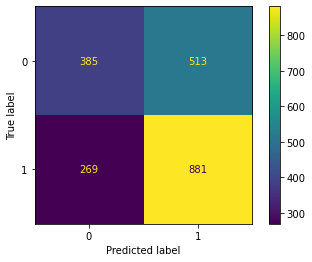

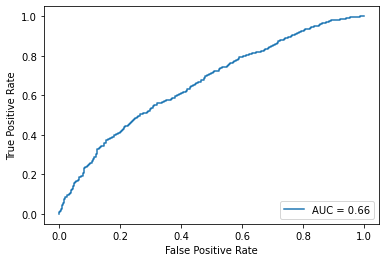

In [24]:
model = LogisticRegression(solver='saga', max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
TN, FP, FN, TP = confusion_mat.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
y_prob = model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob) 
print('Confusion Matrix:\n', confusion_mat)
print("\nClassification Report:\n", report)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
confusion_mat_display = ConfusionMatrixDisplay(confusion_mat).plot()
roc_curve_display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()

#### Support Vector Machine (SVM)

Confusion Matrix:
 [[408 490]
 [298 852]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.45      0.51       898
           1       0.63      0.74      0.68      1150

    accuracy                           0.62      2048
   macro avg       0.61      0.60      0.60      2048
weighted avg       0.61      0.62      0.61      2048

Accuracy: 0.615234375
Precision: 0.6348733233979136
Recall: 0.7408695652173913
F1-Score: 0.6837881219903692


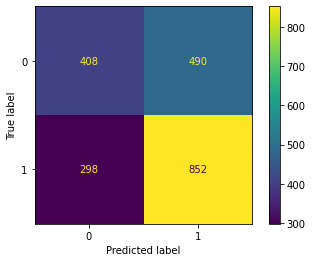

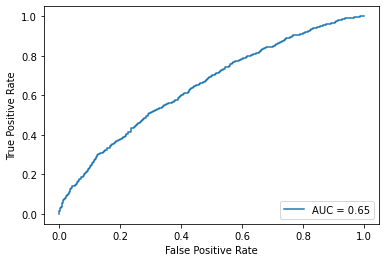

In [25]:
svm_model = OneVsRestClassifier(SVC(kernel='linear'))
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
TN, FP, FN, TP = confusion_mat.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
y_prob = svm_model.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob) 
print('Confusion Matrix:\n', confusion_mat)
print("\nClassification Report:\n", report)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
confusion_mat_display = ConfusionMatrixDisplay(confusion_mat).plot()
roc_curve_display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()

#### Naive Bayes Algorithms (NB)

Confusion Matrix:
 [[278 620]
 [161 989]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.31      0.42       898
           1       0.61      0.86      0.72      1150

    accuracy                           0.62      2048
   macro avg       0.62      0.58      0.57      2048
weighted avg       0.62      0.62      0.58      2048

Accuracy: 0.61865234375
Precision: 0.6146674953387197
Recall: 0.86
F1-Score: 0.7169264226168902


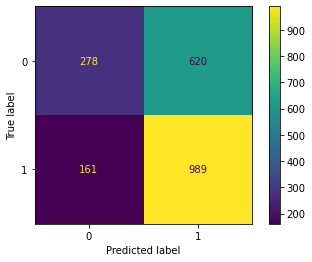

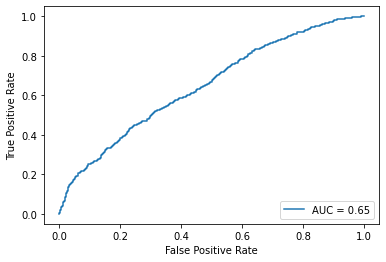

In [26]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
TN, FP, FN, TP = confusion_mat.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
y_prob = NB.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr) 
print('Confusion Matrix:\n', confusion_mat)
print("\nClassification Report:\n", report)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
confusion_mat_display = ConfusionMatrixDisplay(confusion_mat).plot()
roc_curve_display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()

#### Decision Tree (DT)

Confusion Matrix:
 [[ 116  782]
 [  69 1081]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.13      0.21       898
           1       0.58      0.94      0.72      1150

    accuracy                           0.58      2048
   macro avg       0.60      0.53      0.47      2048
weighted avg       0.60      0.58      0.50      2048

Accuracy: 0.58447265625
Precision: 0.5802469135802469
Recall: 0.94
F1-Score: 0.717557251908397


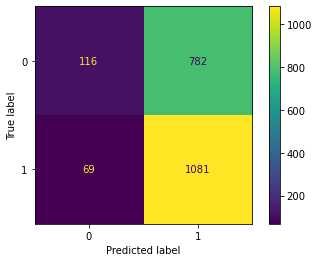

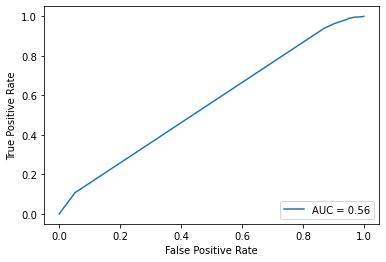

In [27]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
TN, FP, FN, TP = confusion_mat.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
y_prob = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
print('Confusion Matrix:\n', confusion_mat)
print("\nClassification Report:\n", report)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
confusion_mat_display = ConfusionMatrixDisplay(confusion_mat).plot()
roc_curve_display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()

#### Random Forest (RF)

Confusion Matrix:
 [[484 414]
 [371 779]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.54      0.55       898
           1       0.65      0.68      0.66      1150

    accuracy                           0.62      2048
   macro avg       0.61      0.61      0.61      2048
weighted avg       0.61      0.62      0.62      2048

Accuracy: 0.61669921875
Precision: 0.6529756915339481
Recall: 0.6773913043478261
F1-Score: 0.6649594536918482


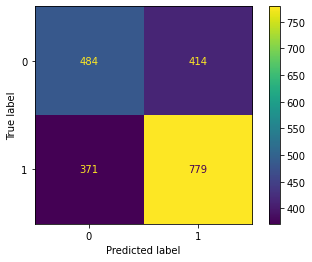

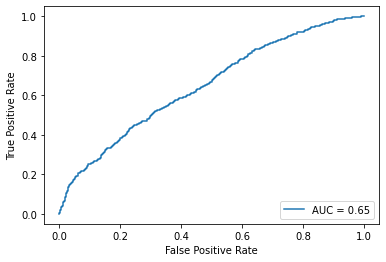

In [28]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='entropy', random_state=42, class_weight='balanced', bootstrap=True)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
TN, FP, FN, TP = confusion_mat.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
y_prob = NB.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
print('Confusion Matrix:\n', confusion_mat)
print("\nClassification Report:\n", report)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
confusion_mat_display = ConfusionMatrixDisplay(confusion_mat).plot()
roc_curve_display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()

#### Passive Aggressive Algorithm

Confusion Matrix:
 [[465 433]
 [478 672]]

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.52      0.51       898
           1       0.61      0.58      0.60      1150

    accuracy                           0.56      2048
   macro avg       0.55      0.55      0.55      2048
weighted avg       0.56      0.56      0.56      2048

Accuracy: 0.55517578125
Precision: 0.6081447963800904
Recall: 0.5843478260869566
F1-Score: 0.5960088691796009


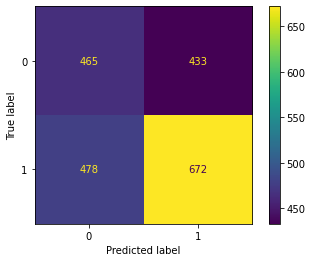

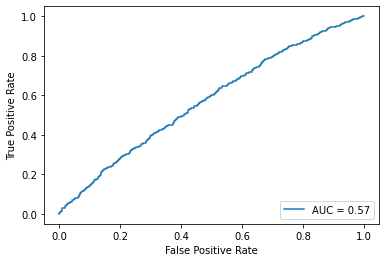

In [29]:
clf = PassiveAggressiveClassifier(max_iter=500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
TN, FP, FN, TP = confusion_mat.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)
y_prob = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob) 
print('Confusion Matrix:\n', confusion_mat)
print("\nClassification Report:\n", report)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)
confusion_mat_display = ConfusionMatrixDisplay(confusion_mat).plot()
roc_curve_display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()